In [37]:
library(tidyverse)
library(httr)
library(dplyr)
library(rvest)
library(tibble)
library(ggplot2)
library(dplyr)
library(tidyverse)
library(lubridate) 
#install.packages('ggpubr')
#library('ggpubr')
install.packages('GoFKernel')
library('GoFKernel')

Warning message:
"package 'GoFKernel' is in use and will not be installed"

1. Evaluate the expected values, E[X], and the variance, Var(X), for both methods

In [9]:
x <-c(15.58, 15.9, 16, 16.1, 16.2)
p1 <-c(0.15, 0.21, 0.35, 0.15, 0.14)
p2 <-c(0.14, 0.05, 0.64, 0.08, 0.09)

E1 <- sum(p1*x)
E2 <- sum(p2*x)
Var1 <- sum(p1*x^2)-E1^2
Var2 <- sum(p2*x^2)-E2^2

print(paste("E1=", E1))
print(paste("E2=", E2))
print(paste("Var1=", Var1))
print(paste("Var2=", Var2))

[1] "E1= 15.959"
[1] "E2= 15.9622"
[1] "Var1= 0.0339790000000164"
[1] "Var2= 0.0281671599999811"


2. 

  A) simulate the waiting time for 50 people at the doctor's once and plot the relative
  histogram

  B) what is the probability that a person will wait for less than 10 minutes ?

  C) evaluate the average waiting time from the simulated data and compare it with
  the expected value (calculated from theory and by manipulating the probability
  distributions using R)

  D) what is the probability for waiting more than one hour before being received ?

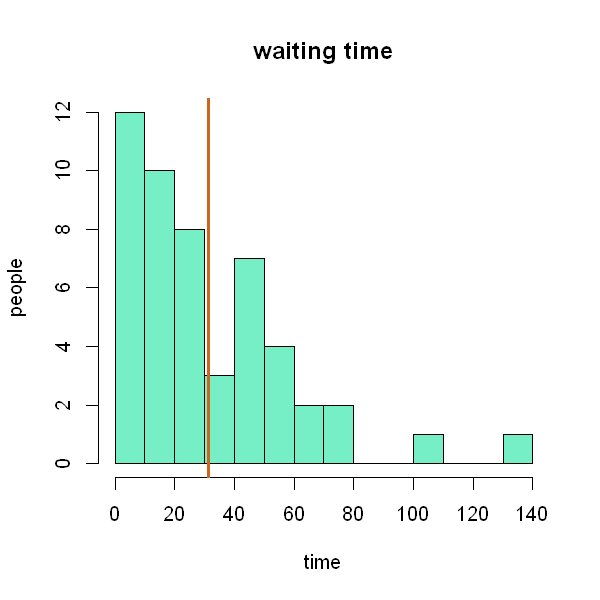

In [10]:
wait_time <- 1/48
lambda <- 1/30
n <- 50
waiting50 <- rexp(n,lambda) #exp pdf

hist1 <- hist(waiting50, breaks=15, col='aquamarine2', xlab='time', ylab='people', main='waiting time')

abline(v = mean(waiting50),                 # Add line for mean
       col = "chocolate3",
       lwd = 3)
text(x = mean(waiting50) * 1.,              # Add text for mean
     y = mean(waiting50) * 1.,
     paste("Mean =", mean(waiting50)),
     col = "chocolate3",
     )

In [11]:
less_10 <- pexp(10, lambda)
print(paste("Probability of waiting less than 10 minutes: ", less_10))


[1] "Probability of waiting less than 10 minutes:  0.283468689426211"


1) theoretical average waiting time is 30 minutes 1/lambda

2) in the histogram the mean function helps to find the average from the simulated data (has been done previously)

3) from the pdf by using the definition of expectation value: $ E[x] = \sum_{x=1}^{N} x \cdot p(x) $

In [12]:
mean_exact <- 1/lambda
d <- dexp(0:120, lambda) #0:120 range of values in the hist #exponential density function
mean_theo <- sum(0:120*d)
mean_exp <- mean(waiting50)

print(paste("True mean:", mean_exact))
print(paste("Theoretical mean:", mean_theo))
print(paste("Experimental mean:", mean_exp))


[1] "True mean: 30"
[1] "Theoretical mean: 27.2863551916219"
[1] "Experimental mean: 31.1905635053861"


In [13]:
more_60 <- 1 - pexp(60, lambda)
print(paste("Probability of waiting more than 60 minutes: ", more_60))


[1] "Probability of waiting more than 60 minutes:  0.135335283236613"


3. let's suppose that on a book, on average, there is one typo error every three pages.
If the number of errors follows a Poisson distribution, plot the pdf and cdf, and
calculate the probability that there is at least one error on a specific page of the
book

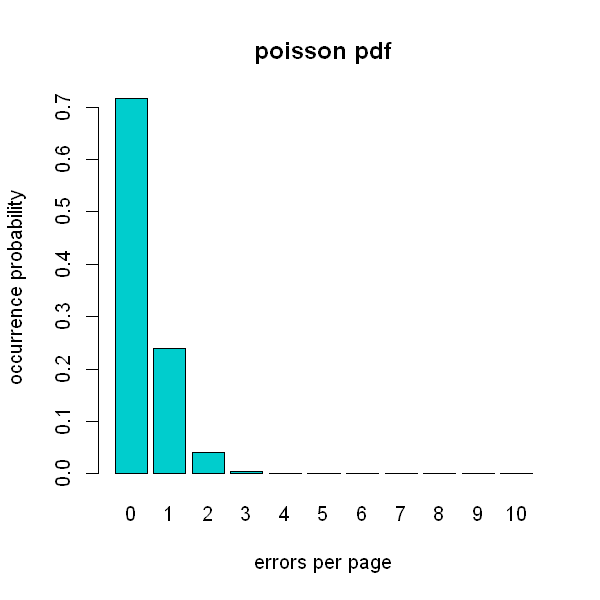

[1] "Probability of one error on a specific page 0.283468689426211"


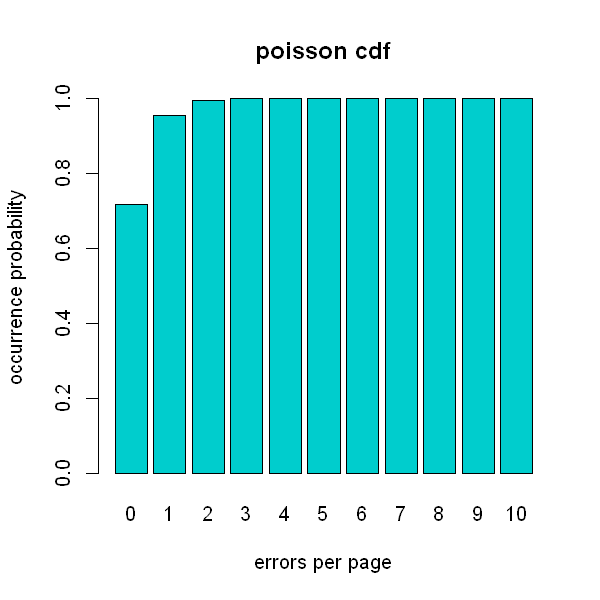

In [14]:
lambda <- 1/3
typo <- 0:10
dhist <- dpois (typo, lambda)
phist <- ppois (typo, lambda)
barplot(dhist, col='cyan3', names=0:10, xlab='errors per page', ylab='occurrence probability', main='poisson pdf')
barplot(phist, col='cyan3', names=0:10, xlab='errors per page', ylab='occurrence probability', main='poisson cdf')

err_1 <- 1 - ppois(0, lambda)
print(paste('Probability of one error on a specific page', err_1))

4. we randomly draw cards from a deck of 52 cards, with replacement, until one ace is
drawn. Calculate the probability that at least 10 draws are needed.

In [15]:
#it follows the geometric distribution 
ace <- 4/52
draw <- pgeom(9, ace)
p10 <- 1-draw
print(paste("Probability that at least 10 draws are needed =", p10))

[1] "Probability that at least 10 draws are needed = 0.449137107141863"


5. 
  a) using the integrate() R function, determine the constant c (and verify it analytically)
  
  b) write the set of four R functions and plot the pdf and cdf, respectively
  
  c) evaluate the probability that the student will finish the aptitude test in more than
  75 minutes. And that it will take 90 and 120 minutes.

f(t) is a pdf and must be normalized to get c:

\begin{equation}
\int_1^2 f(t) dt = 1 \Longrightarrow 
c = \left[ \int_1^2 (t-1)(2-t) dt \right]^{-1}
\end{equation}

Analytical result:

\begin{equation}
\int_1^2 (t-1)(2-t) dt = \left[ -\frac{t^3}{3}+\frac{3t^2}{2}-2t \right]_1^2 = \frac{1}{6}\\
\Longrightarrow c = 6
\end{equation}

In [38]:
#numerical computation 
f_integral <- integrate(function(x) {(x-1)*(2-x)}, lower = 1, upper = 2)
c <- 1/f_integral$value
print(paste('c = ', c))

[1] "c =  6"


The pdf is given by: $f(t)$.

The cdf is defined as: $F(X) = \int_{-\infty}^X f(t) dt$.
The already computed integral of the pdf:
$$
 6 \left[ \frac{3t^2}{2}-\frac{t^3}{3} -2t \right]_{1}^X = \left[ 9t^2-2t^3 -12t \right]_{1}^X 
$$



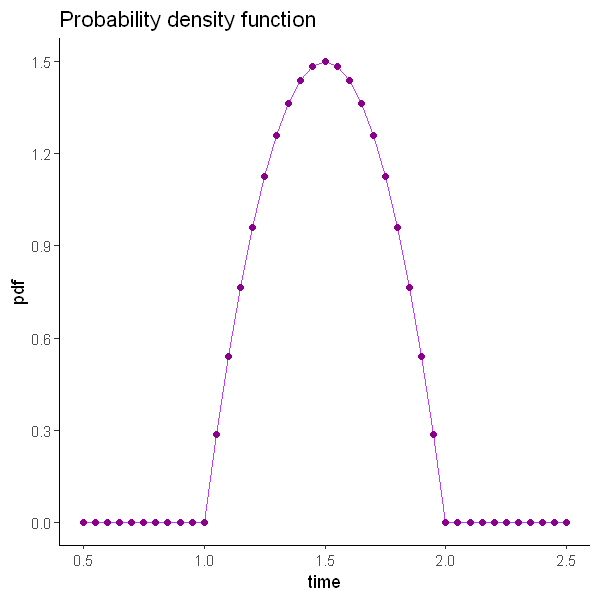

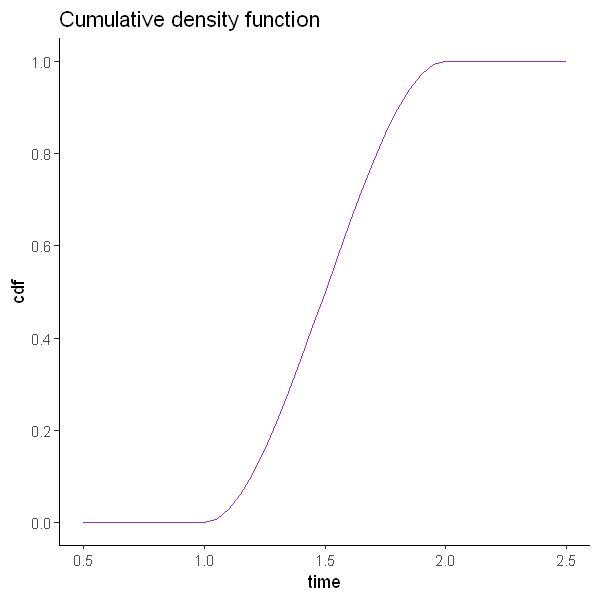

In [39]:
#pdf----------------------------------------------------------------------------
dfun <- function (t) {
    dfu <- ifelse((t>1 & t<2), c*(t-1)*(2-t), 0)
    return (dfu)
}
dfun <- Vectorize(dfun)

#cdf using integrate()----------------------------------------------------------
pfun <- function(X) {
    pfu <- ifelse((X>1 & X<2), 
                  integrate(dfun,1,X)$value,
                  ifelse(X <= 1, 0, 1)
                 )
    return (pfu)
}
pfun <- Vectorize(pfun)

#qf------------------------------------------------------------------------------
qfu <- inverse(pfun, 1, 2)  
qfu <- Vectorize(qfu)

# generate random numbers sampled from our distribution with N samples------------
rfun <- function(N, cdf, inf, sup) {
    u <- runif(N)
    rfu <- Vectorize(inverse(cdf, inf, sup)) #invert the cdf in the interval specified
    return (rfu(u))
}
#plot settings
t <- seq(0.5, 2.5, 0.05)
pdf <- dfun(t)
cdf <- pfun(t)
qua <- qfu(cdf)
df_plots  <- data.frame(t, pdf, cdf, qua)
# plot pdf
options(repr.plot.width=5, repr.plot.height=5)
d_plot <- ggplot(df_plots, aes(x=t, y=pdf)) +
            geom_line(color="darkorchid1") +
            geom_point(color="darkmagenta")+
            labs(title = "Probability density function") +
            theme_classic()+
            scale_x_continuous(name= "time")+
            scale_y_continuous(breaks=seq(0, 1.5, 0.3))
print(d_plot)
# plot cdf
p_plot <- ggplot(df_plots, aes(x=t, y=cdf)) +
            geom_line( color="darkorchid3") +
            labs(title = "Cumulative density function") +
            theme_classic()+
            scale_x_continuous(name= "time")+
            scale_y_continuous(breaks=seq(0, 1, 0.2))
            
print(p_plot)

In [40]:
#probability of more thn 75 minutes
p_75 <- integrate(dfun, 75/60, Inf) #equivalent to calculate 1 - pf(75/60) with cdf
print(paste("Probability that a student finishes the test in more than 75 minutes:",p_75$value))
#probability of more thn 90 minutes
p_90 <- integrate(dfun, 90/60, Inf) #equivalent to calculate 1 - pf(90/60) with cdf
print(paste("Probability that a student finishes the test in more than 90 minutes:",p_90$value))
#probability of more thn 120 minutes
p_120 <- integrate(dfun, 120/60, Inf) #equivalent to calculate 1 - pf(120/60) with cdf
print(paste("Probability that a student finishes the test in more than 120 minutes:",p_120$value))
#prob between 90 and 120 minutes
p_90_120 <- integrate(dfun, 90/60, 120/60)
print(paste("Probability that student needs between 90 and 120 minutes to finish the test:",p_90_120$value))

[1] "Probability that a student finishes the test in more than 75 minutes: 0.843749922465159"
[1] "Probability that a student finishes the test in more than 90 minutes: 0.499999999496293"
[1] "Probability that a student finishes the test in more than 120 minutes: 0"
[1] "Probability that student needs between 90 and 120 minutes to finish the test: 0.5"


6. 
  a) write the set of four R functions and plot the pdf and cdf, respectively
  
  b) determine the probability that tires will last less than 15000 km
  
  c) sample 3000 random variables from the distribution and determine the mean value
  and the variance, using the expression V ar(X) = E[X2] - E[X]2
  

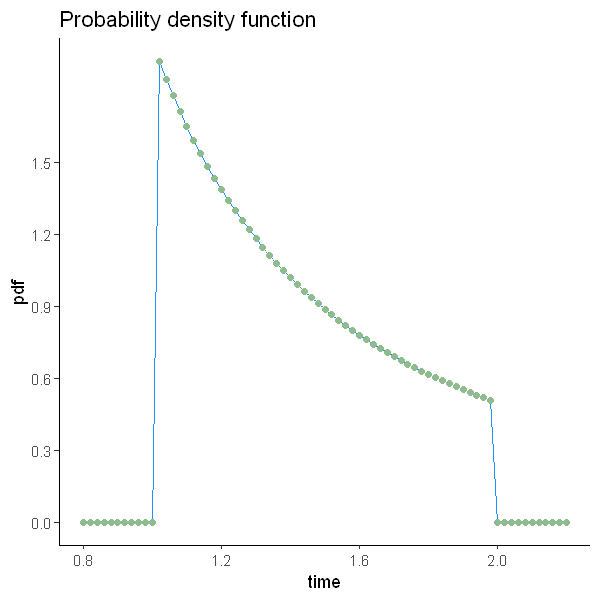

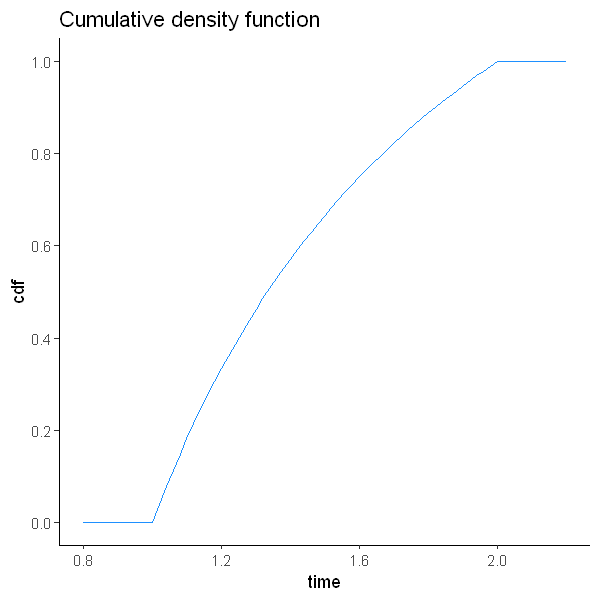

In [34]:
# pdf --------------------------------------------------------------------------
dfun <- function (x) {
    dfu <- ifelse((x>1 & x<2), 2/x^2, 0)
    return (dfu)
}
dfun <- Vectorize(dfun)

# cdf--------------------------------------------------------------------------
pfun <- function (X) {
    pfu <- ifelse((X>1 & X<2), 
                  (-2/X+2),
                  ifelse(X <= 1, 0, 1)
                 )
    return (pfu)
}
pfun <- Vectorize(pfun)

# qf------------------------------------------------------------------------------
qfun <- function (p) {
    qfu <- 2/(2-p)
    return (qfu)
}
qfun <- Vectorize(qfun)
# Random sampling ---------------------------------------------------------------
rfun <- function (N){
    u <- runif(N)
    rfu <- Vectorize(2/(2-u))
    return(rfu)
}

#Plots to check results
x <- seq(0.8, 2.2, 0.02)
pdf <- dfun(x)
cdf <- pfun(x)
qua <- qfun(cdf)
df_plots  <- data.frame(x, pdf, cdf, qua)
# Plot of pdf
options(repr.plot.width=5, repr.plot.height=5)
d_plot <- ggplot(df_plots, aes(x=x, y=pdf)) +
            geom_line(color="dodgerblue") +
            geom_point(color="darkseagreen")+
            labs(title = "Probability density function") +
            theme_classic()+
            scale_x_continuous(name= "time")+
            scale_y_continuous(breaks=seq(0, 1.5, 0.3))
print(d_plot)
# plot cdf
p_plot <- ggplot(df_plots, aes(x=x, y=cdf)) +
            geom_line( color="dodgerblue") +
            labs(title = "Cumulative density function") +
            theme_classic()+
            scale_x_continuous(name= "time")+
            scale_y_continuous(breaks=seq(0, 1, 0.2))
            
print(p_plot)

In [35]:
# less than 15000km
pd_15 <- integrate(dfun, -Inf, 1.5) # Integrating the pdf
print(paste("The probability that the tires will last less than 15000 km is:", pd_15$value))


[1] "The probability that the tires will last less than 15000 km is: 0.666666674065053"


The expected values is computed by its definition $E(x) = \int_{1}^{2} x \cdot \frac{1}{x^2}$

In [36]:
Ex <- integrate(function(x) {x*dfun(x)}, 1, 2)
Ex2 <- integrate(function(x) {x^2*dfun(x)}, 1, 2)
var <-  Ex2$value - (Ex$value)^2
print(paste("Expected value:", Ex$value))
print(paste("Variance:", var))

[1] "Expected value: 1.38629436111989"
[1] "Variance: 0.0781879443271938"
